
1. Create a dataframe called ‘exposome’ using the exposome dataset and answer the
following questions. Refer the Codebook file to find the field and values. You will
use the datasets and dataframe from Part 1 of this assignment.
    1. Add a new column to the dataframe exposome called ‘cotinine_combination’
which combines all possible values of cotinine in mother
(hs_cotinine_mcat_None) and cotinine in child (hs_cotinine_cdich_None). Create
values of your choice in this new field and provide a count for each of these
combined values. (15 Points)
    2. Using the exposome and phenotype dataframes, plot ‘cotinine_combination’
and the patients having doctor diagnosed asthma. 15 Points)




In [1]:
#Questoin 1.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy import distance
import calendar

df_exposome = pd.read_csv('exposome.csv')
df_codebook = pd.read_csv('codebook.csv')

# Check each column name and add to list if it contains 'cotinine'
cotinine_col = []

for column in df_exposome.columns:
    if 'cotinine' in column:
        cotinine_col.append(column)

# extract relavent variables from codebook
codes = df_codebook[df_codebook['variable_name'].isin(cotinine_col)] # Looks like we are intersted in hs_cotinine_cdich and hs_cotinine_mcat columns

# Identify unique values for relavent columns
cdich_unique = df_exposome['hs_cotinine_cdich_None'].unique()
mcat_unique = df_exposome['hs_cotinine_mcat_None'].unique()

# Combine two columns and add to exposome dataframe
df_exposome['cotinine_combined'] = df_exposome['hs_cotinine_cdich_None'] + " " + df_exposome['hs_cotinine_mcat_None']

# Counts of each cotinine_combined value
df_exposome['cotinine_combined'].value_counts()

cotinine_combined
Undetected Non-smokers    697
Undetected Smokers        273
Detected Smokers          112
Undetected SHS smokers    108
Detected Non-smokers       62
Detected SHS smokers       49
Name: count, dtype: int64

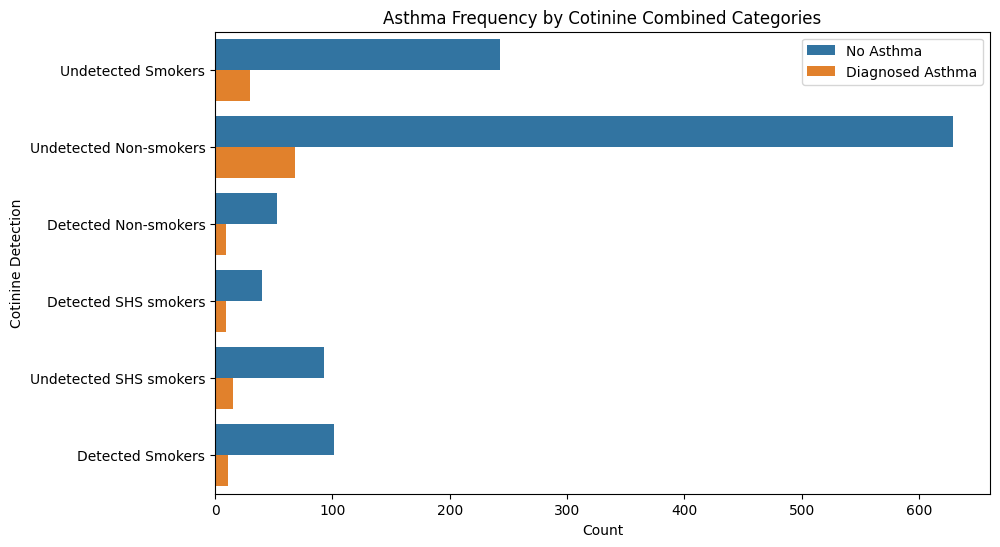

In [31]:
# Question 1.2
df_phenotype = pd.read_csv('phenotype.csv')

# double check codes for phenotype asthma
codes = df_codebook[df_codebook['variable_name'] == 'hs_asthma'] # Codes don't specifiy but we'll assume 0 = no asthma, 1 = asthma

# Merge phenotype and exposome dataframes
df_combined = pd.merge(df_phenotype, df_exposome, on='ID')
df_combined.head()

# plot
plt.figure(figsize=(10, 6))
sns.countplot(y='cotinine_combined', hue='hs_asthma', data=df_combined)
plt.title('Asthma Frequency by Cotinine Combined Categories')
plt.xlabel('Count')
plt.ylabel('Cotinine Detection')
legend_labels = ['No Asthma', 'Diagnosed Asthma']
plt.legend(labels=legend_labels)
plt.show()

2. Please use the file ‘NO2_2020_California’ to answer the following questions. You can
use Python, R, or other programming languages that you are familiar with:
    1. How many unique county names are in this file? After checking how many
unique counties in this file, please choose a reasonable plot to show the
distribution of counties. You can use either matplotlib or seaborn. (15 Points)

Unique Counties: 
33


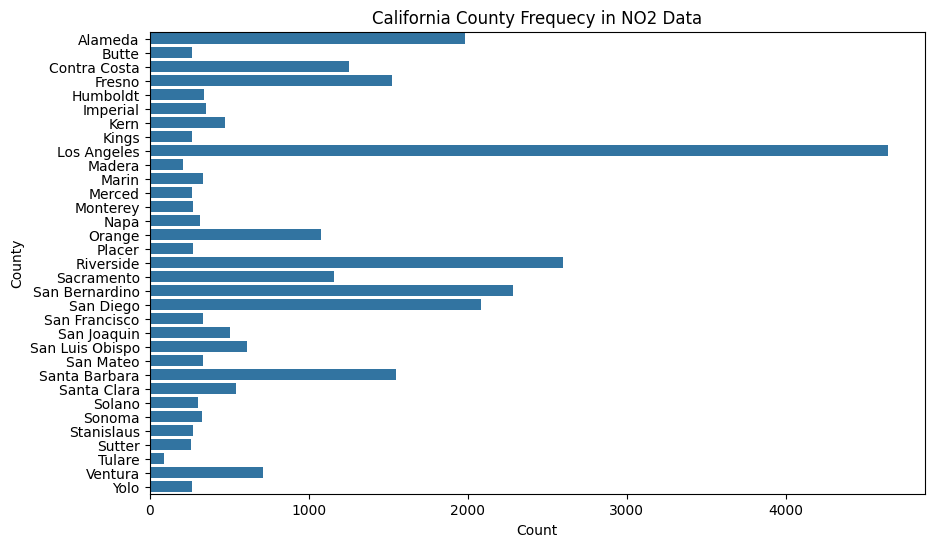

In [30]:
# Question 2.1
df_NO2 = pd.read_csv('NO2_2020_CA.csv')

# find unique counties
county_unique = df_NO2['COUNTY'].unique()
print("Unique Counties: ")
print(len(county_unique))

# plot
plt.figure(figsize=(10, 6))
sns.countplot(y='COUNTY', data=df_NO2)
plt.title('California County Frequecy in NO2 Data')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()

3. Please use the file ‘NO2_2020_California’ to answer the following questions:
    1. Find the geo-coordinates for ‘Martin Luther King High School’ with address
‘9301 Wood Rd, Riverside, CA 92508’. (5 Points)
    2. Find the nearest monitor by distance in the file ‘NO2_2020_California’ to the
above school. (10 Points)
    3. Next, find the monthly average, monthly minimum and monthly maximum for
NO2 for this monitor for the year 2020. (15 Points)
    4. Plot the monthly average, monthly minimum and monthly maximum NO2 on a
graph using matplotlib or seaborn. (15 Points)

In [4]:
# Question 3.1


# Find MLK High geocoordinates
geolocator = Nominatim(user_agent="wrangling assignment 2")
mlk_location = geolocator.geocode("9301 Wood Rd, Riverside, CA 92508")
mlk_lat = mlk_location.latitude
mlk_long = mlk_location.longitude
print("MLK Highschool Geocoordinates: ")
print(mlk_lat, mlk_long)



MLK Highschool Geocoordinates: 
33.8826141 -117.33344395658602


In [5]:
# Question 3.2
# Find closest monitoring station
min_distance = float('inf')
closest_site = None
for index, row in df_NO2.iterrows():
    site_lat = row['SITE_LATITUDE']
    site_long = row['SITE_LONGITUDE']
    site_name = row
    site_distance = distance.distance((mlk_lat, mlk_long), (site_lat, site_long)).miles
    if site_distance < min_distance:
        min_distance = site_distance
        closest_site = row

print("Closest Monitoring Site: ")
display(closest_site)

Closest Monitoring Site: 


Date                                                              1/1/2020
Source                                                                 AQS
Site ID                                                           60658001
POC                                                                      2
Daily Max 1-hour NO2 Concentration                                    30.0
UNITS                                                                  ppb
DAILY_AQI_VALUE                                                         28
Site Name                                                         Rubidoux
DAILY_OBS_COUNT                                                         24
PERCENT_COMPLETE                                                       100
AQS_PARAMETER_CODE                                                   42602
AQS_PARAMETER_DESC                                  Nitrogen dioxide (NO2)
CBSA_CODE                                                            40140
CBSA_NAME                

In [19]:
# Question 3.3
# find the monthly average, monthly minimum and monthly maximum forNO2 for this monitor for the year 2020.

# Filter by year and site
df_filtered = df_NO2[df_NO2['Date'].str.contains('2020')][df_NO2['Site ID'] == closest_site['Site ID']]

# Convert date to datetime and sort
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered.sort_values('Date')



# Iterage through each month and calculate the average, minimum, and maximum NO2 levels
monthly = []

for month in range(1, 13):
    month_data = df_filtered[df_filtered['Date'].dt.month == month]
    month_name = calendar.month_name[month]
    avg = month_data['Daily Max 1-hour NO2 Concentration'].mean()
    min_val = month_data['Daily Max 1-hour NO2 Concentration'].min()
    max_val = month_data['Daily Max 1-hour NO2 Concentration'].max()
    monthly.append({"Month": month_name, "NO2 Average": avg, "NO2 Minimum": min_val, "NO2 Maximum": max_val})
    
df_monthly = pd.DataFrame(monthly)
display(df_monthly)

,Month,NO2 Average,NO2 Minimum,NO2 Maximum
0,January,33.346774,17.0,42.9
1,February,32.884483,4.4,47.1
2,March,23.253333,5.5,40.7
3,April,20.180000,4.1,39.8
4,May,20.096774,4.3,51.6
5,June,15.813333,3.0,49.6
6,July,17.829032,7.4,51.2
7,August,22.804839,6.1,47.8
8,September,38.426000,11.8,56.0
9,October,36.463333,8.1,59.4


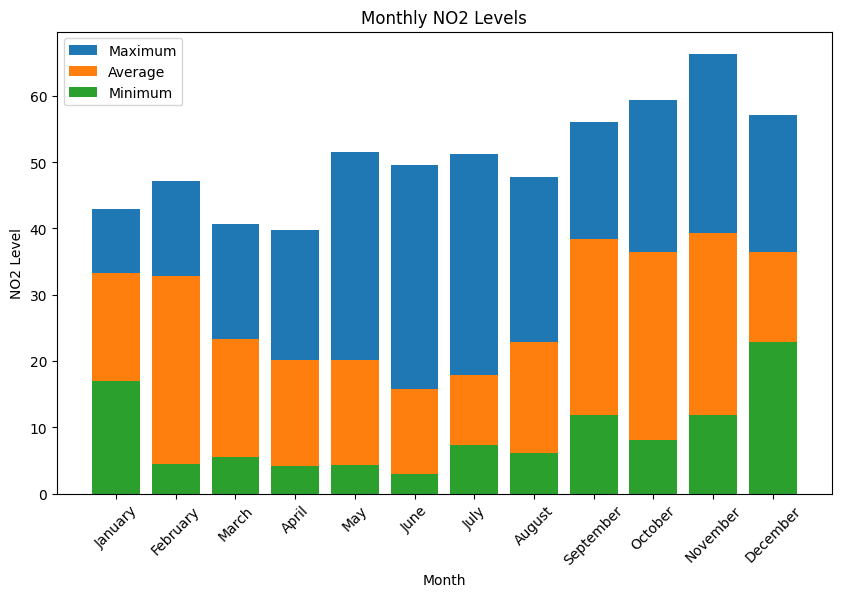

In [33]:
# plot
plt.figure(figsize=(10, 6))
plt.bar(df_monthly['Month'], df_monthly['NO2 Maximum'])
plt.bar(df_monthly['Month'], df_monthly['NO2 Average'])
plt.bar(df_monthly['Month'], df_monthly['NO2 Minimum'])
plt.title('Monthly NO2 Levels')
plt.xlabel('Month')
plt.ylabel('NO2 Level')
plt.legend(['Maximum', 'Average', 'Minimum'])
plt.xticks(rotation=45)
plt.show()